In [6]:
import json

with open('results.json') as f:
    results = json.load(f)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [9]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. blank: 0.2477
	2. up: 0.2345
	3. angle: 0.1757
	4. shape: 0.1605
	5. canvas: 0.1068
	6. blue: 0.1051
	7. position: 0.1013
	8. round: 0.0932
	9. this: 0.0764
	10. three: 0.0628
	11. rotate: 0.0539
	12. green: 0.0381
	13. color: 0.0378
	14. red: 0.0374
	15. right: 0.0231
	16. unrotate: 0.0205
	17. white: 0.0146
	18. four: 0.0122
	19. bottom: 0.0000
	20. is: 0.0000
	21. <pad>: 0.0000
	22. left: 0.0000
	23. has: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


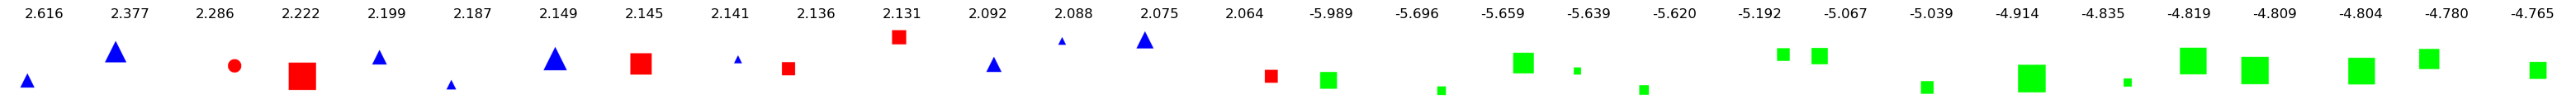

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.3557
	2. round: 0.1960
	3. is: 0.1906
	4. green: 0.1852
	5. bottom: 0.1682
	6. red: 0.1681
	7. blue: 0.1044
	8. blank: 0.0860
	9. unrotate: 0.0734
	10. this: 0.0639
	11. position: 0.0621
	12. rotate: 0.0525
	13. up: 0.0519
	14. angle: 0.0187
	15. left: 0.0100
	16. four: 0.0053
	17. right: 0.0005
	18. has: 0.0005
	19. three: 0.0000
	20. white: 0.0000
	21. color: 0.0000
	22. shape: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


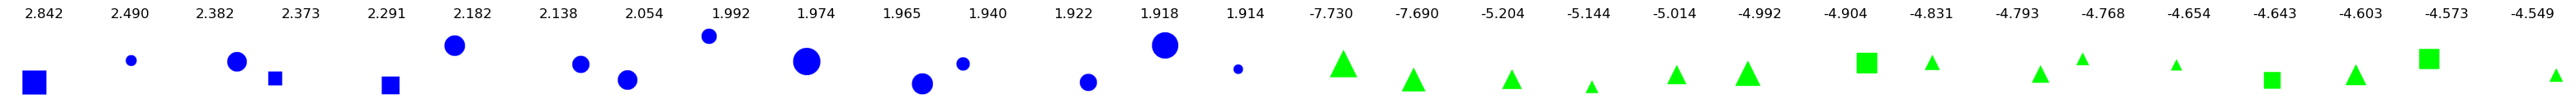

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. color: 0.7400
	2. shape: 0.1197
	3. right: 0.0900
	4. has: 0.0865
	5. four: 0.0766
	6. white: 0.0177
	7. up: 0.0044
	8. blank: 0.0044
	9. three: 0.0008
	10. position: 0.0001
	11. is: 0.0000
	12. <pad>: 0.0000
	13. round: 0.0000
	14. left: 0.0000
	15. unrotate: 0.0000
	16. bottom: 0.0000
	17. blue: 0.0000
	18. canvas: 0.0000
	19. this: 0.0000
	20. red: 0.0000
	21. green: 0.0000
	22. rotate: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


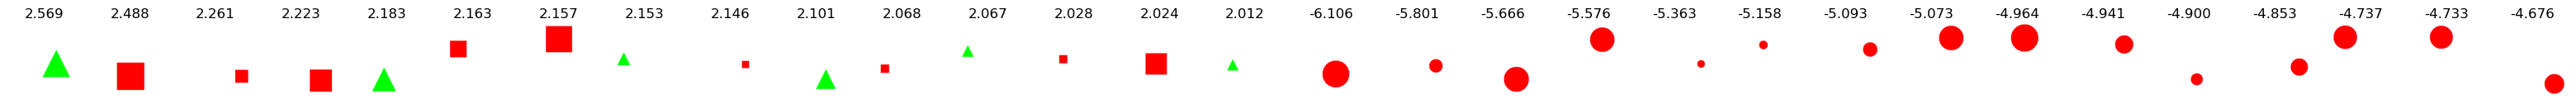

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. has: 0.3577
	2. four: 0.2819
	3. color: 0.2516
	4. shape: 0.1611
	5. right: 0.1471
	6. this: 0.1099
	7. three: 0.0637
	8. left: 0.0445
	9. position: 0.0208
	10. bottom: 0.0111
	11. angle: 0.0028
	12. up: 0.0018
	13. green: 0.0013
	14. blue: 0.0000
	15. <pad>: 0.0000
	16. is: 0.0000
	17. round: 0.0000
	18. blank: 0.0000
	19. unrotate: 0.0000
	20. red: 0.0000
	21. canvas: 0.0000
	22. rotate: 0.0000
	23. white: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


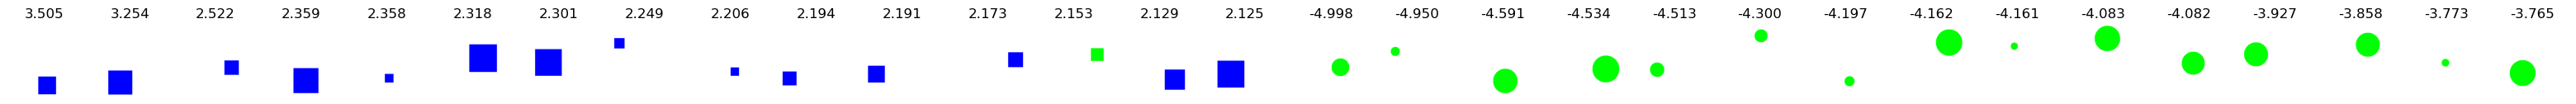

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. has: 0.2317
	2. blue: 0.2173
	3. right: 0.2098
	4. this: 0.1986
	5. green: 0.1851
	6. round: 0.1691
	7. angle: 0.1355
	8. bottom: 0.1156
	9. up: 0.1113
	10. unrotate: 0.0848
	11. blank: 0.0845
	12. four: 0.0379
	13. white: 0.0297
	14. canvas: 0.0211
	15. rotate: 0.0178
	16. red: 0.0133
	17. left: 0.0090
	18. color: 0.0014
	19. position: 0.0000
	20. is: 0.0000
	21. <pad>: 0.0000
	22. shape: 0.0000
	23. three: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


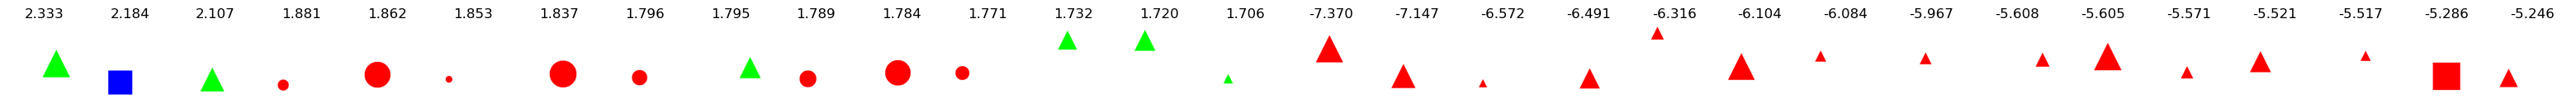

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. blank: 0.3770
	2. green: 0.3275
	3. round: 0.1959
	4. is: 0.1712
	5. canvas: 0.1585
	6. position: 0.1362
	7. bottom: 0.1044
	8. rotate: 0.0980
	9. up: 0.0967
	10. red: 0.0698
	11. color: 0.0576
	12. shape: 0.0501
	13. blue: 0.0432
	14. angle: 0.0026
	15. white: 0.0000
	16. three: 0.0000
	17. has: 0.0000
	18. four: 0.0000
	19. unrotate: 0.0000
	20. right: 0.0000
	21. this: 0.0000
	22. left: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


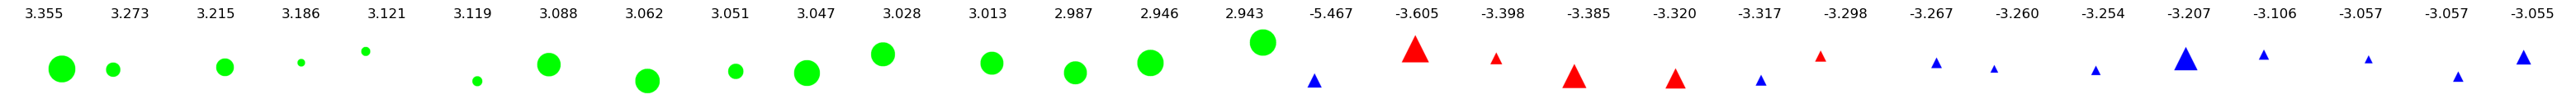

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. shape: 0.1548
	2. three: 0.1483
	3. white: 0.1416
	4. unrotate: 0.1363
	5. angle: 0.1347
	6. rotate: 0.1118
	7. four: 0.1055
	8. right: 0.1047
	9. left: 0.1036
	10. position: 0.1015
	11. color: 0.0924
	12. blue: 0.0710
	13. up: 0.0634
	14. this: 0.0599
	15. red: 0.0350
	16. blank: 0.0315
	17. bottom: 0.0277
	18. green: 0.0220
	19. canvas: 0.0087
	20. is: 0.0040
	21. has: 0.0026
	22. <pad>: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


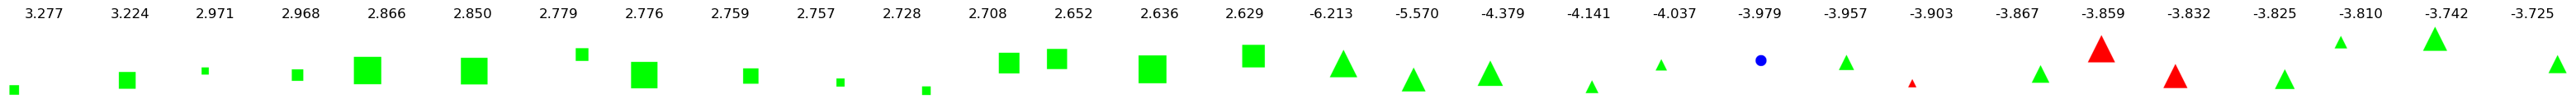

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. has: 0.5846
	2. color: 0.2360
	3. four: 0.2346
	4. bottom: 0.1549
	5. position: 0.0750
	6. left: 0.0609
	7. this: 0.0545
	8. right: 0.0529
	9. round: 0.0461
	10. green: 0.0354
	11. blank: 0.0017
	12. up: 0.0003
	13. is: 0.0000
	14. <pad>: 0.0000
	15. three: 0.0000
	16. red: 0.0000
	17. blue: 0.0000
	18. unrotate: 0.0000
	19. canvas: 0.0000
	20. shape: 0.0000
	21. rotate: 0.0000
	22. white: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


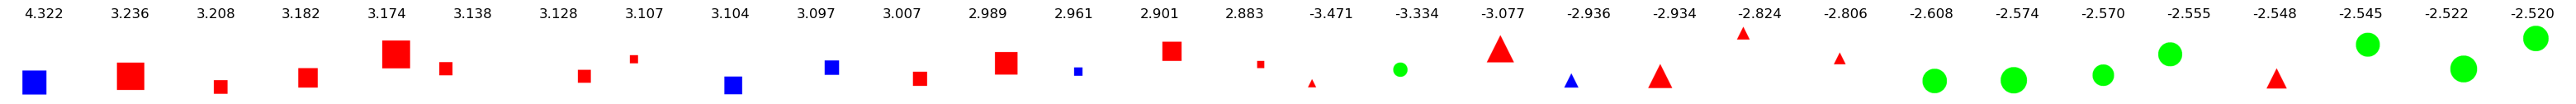

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. left: 0.2082
	2. white: 0.1792
	3. rotate: 0.1715
	4. red: 0.1499
	5. unrotate: 0.1435
	6. position: 0.1308
	7. three: 0.1168
	8. is: 0.1119
	9. four: 0.1056
	10. bottom: 0.0999
	11. color: 0.0685
	12. right: 0.0675
	13. shape: 0.0578
	14. this: 0.0417
	15. angle: 0.0373
	16. canvas: 0.0364
	17. blue: 0.0343
	18. up: 0.0339
	19. green: 0.0092
	20. blank: 0.0028
	21. has: 0.0018
	22. round: 0.0010
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


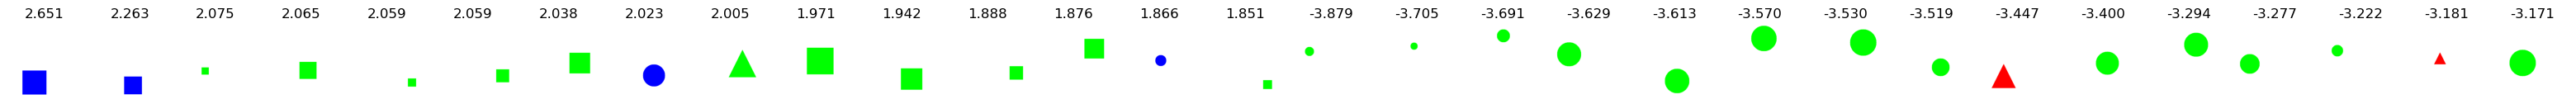

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. has: 0.2931
	2. this: 0.2439
	3. up: 0.2284
	4. blank: 0.1944
	5. angle: 0.1922
	6. right: 0.1630
	7. blue: 0.1448
	8. round: 0.1105
	9. green: 0.0419
	10. shape: 0.0337
	11. color: 0.0182
	12. four: 0.0069
	13. white: 0.0021
	14. unrotate: 0.0000
	15. <pad>: 0.0000
	16. is: 0.0000
	17. bottom: 0.0000
	18. left: 0.0000
	19. red: 0.0000
	20. canvas: 0.0000
	21. position: 0.0000
	22. rotate: 0.0000
	23. three: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


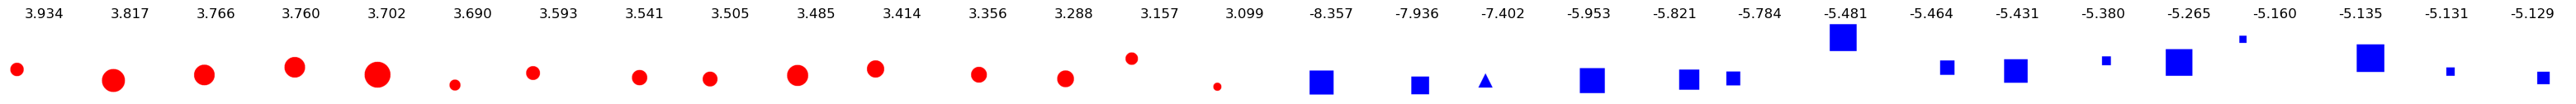

----------------------------------------------------------------------------------------------------


In [10]:
for i in range(11):
    visualize_concept(i)

In [11]:
import torch 

a = torch.tensor([
    [1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2],
    [3, 3, 3, 3, 3, 3]
])

topk_lrg = torch.topk(a.T, k=2, dim=1, largest=True)

In [12]:
topk_lrg

torch.return_types.topk(
values=tensor([[3, 2],
        [3, 2],
        [3, 2],
        [3, 2],
        [3, 2],
        [3, 2]]),
indices=tensor([[2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1],
        [2, 1]]))